In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import date
import math

In [2]:
df_users=pd.read_csv('user data - full.csv')

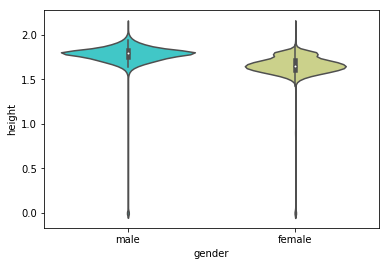

In [3]:
sns.violinplot(x="gender", y="height", data=df_users,palette='rainbow')

In [4]:
gender_male=df_users[df_users.gender == 'male']
df_users.loc[(df_users.gender == 'male') & (df_users.height == 0), 'height']= gender_male.height.median()

In [5]:
gender_female=df_users[df_users.gender == 'female']
df_users.loc[(df_users.gender == 'female') & (df_users.height == 0), 'height']= gender_female.height.median()

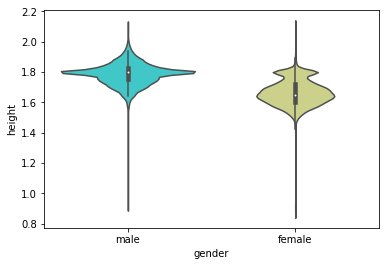

In [6]:
sns.violinplot(x="gender", y="height", data=df_users,palette='rainbow')

In [7]:
gender_male=df_users[df_users.gender == 'male']
df_users.loc[(df_users.gender == 'male') & (df_users.weight == 0), 'weight']= gender_male.weight.median()
gender_female=df_users[df_users.gender == 'female']
df_users.loc[(df_users.gender == 'female') & (df_users.weight == 0), 'weight']= gender_female.weight.median()

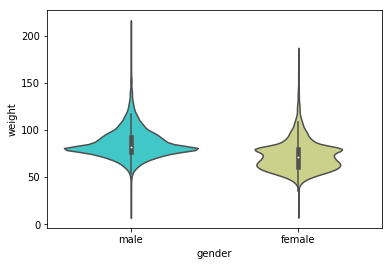

In [8]:
sns.violinplot(x="gender", y="weight", data=df_users,palette='rainbow')

In [9]:
# Define BMI Column
height_squere = df_users.height**2
bmi = df_users.weight/(height_squere)
df_users['BMI'] = bmi

In [10]:
gender_male=df_users[df_users.gender == 'male']
df_users.loc[(df_users.gender == 'male') & (df_users.BMI == 0), 'BMI']= gender_male.BMI.median()
gender_female=df_users[df_users.gender == 'female']
df_users.loc[(df_users.gender == 'female') & (df_users.BMI == 0), 'BMI']= gender_female.BMI.median()

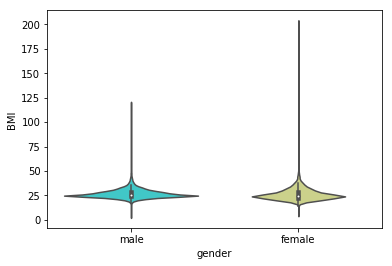

In [11]:
sns.violinplot(x="gender", y="BMI", data=df_users,palette='rainbow')

In [12]:
def GetAgeYears(bday_string):
    if bday_string != bday_string:
        return 0
    if len(bday_string) > 10:
        return 0
    user_bday = datetime.datetime.strptime(bday_string,"%m/%d/%Y").date()
    age = date.today()-user_bday
    days = age.days
    age = math.floor(days/365)
    return age

In [13]:
df_users['age_in_years'] = df_users.birthdate.apply(GetAgeYears)
df_users=df_users.drop(df_users[df_users.age_in_years <= 0].index)

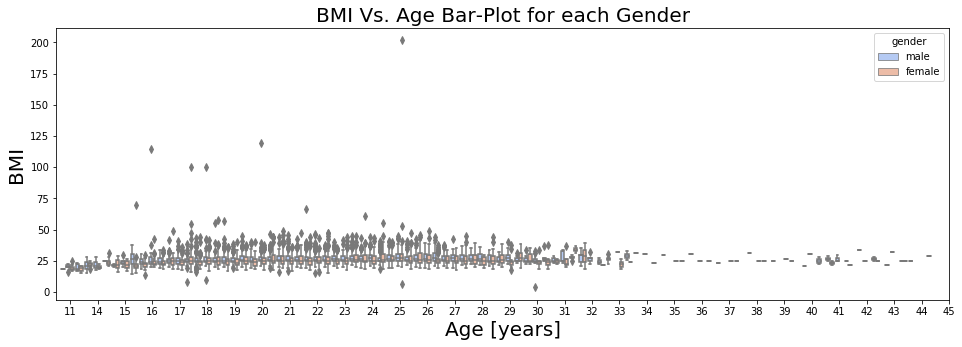

In [17]:
plt.figure(figsize=[16,5])
sns.boxplot(x="age_in_years", y="BMI", hue="gender",data=df_users, palette="coolwarm")
plt.xticks(np.arange(100)[1:100:3])
plt.title("BMI Vs. Age Bar-Plot for each Gender",fontsize=20)
plt.ylabel('BMI',fontsize=20)
plt.xlabel("Age [years]",fontsize=20)
plt.show()

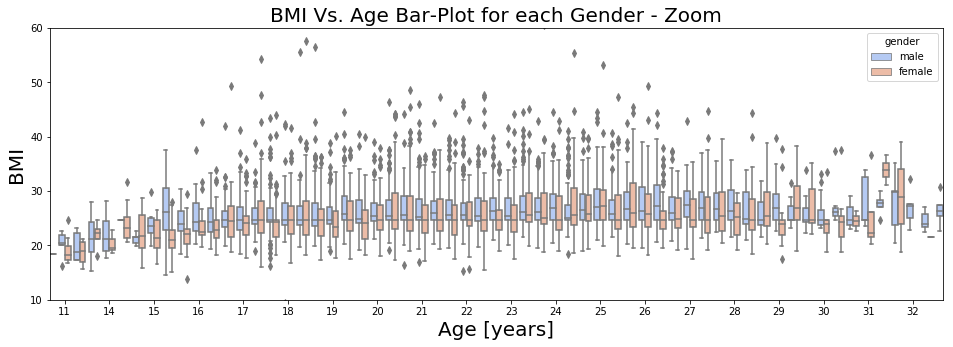

In [25]:
plt.figure(figsize=[16,5])
sns.boxplot(x="age_in_years", y="BMI", hue="gender",data=df_users, palette="coolwarm")
plt.xticks(np.arange(100)[1:100:3])
plt.title("BMI Vs. Age Bar-Plot for each Gender - Zoom",fontsize=20)
plt.ylabel('BMI',fontsize=20)
plt.xlabel("Age [years]",fontsize=20)
plt.ylim(10,60)
plt.xlim(0,60)
plt.show()

In [13]:
df_users.primarytraininggoal.value_counts()

lose_weight         5197
improve_fitness     2507
run_faster          1128
run_farther         1041
reduce_stress        477
maintain_fitness     406
Name: primarytraininggoal, dtype: int64

In [14]:
df_workouts = pd.read_csv('workouts data - full.csv')

C:\Users\idohad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
# 1 - lose_weight
# 2 - improve_fitness
# 3 - run_faster 
# 4 - run_further
# 5 - reduce_stress
# 6 - maintain_fitness
df_users.loc[df_users.primarytraininggoal == 'lose_weight','primarytraininggoal'] = 1
df_users.loc[df_users.primarytraininggoal == 'improve_fitness','primarytraininggoal'] = 2
df_users.loc[df_users.primarytraininggoal == 'run_faster','primarytraininggoal'] = 3
df_users.loc[df_users.primarytraininggoal == 'run_farther','primarytraininggoal'] = 4
df_users.loc[df_users.primarytraininggoal == 'reduce_stress','primarytraininggoal'] = 5
df_users.loc[df_users.primarytraininggoal == 'maintain_fitness','primarytraininggoal'] = 6
df_users.primarytraininggoal.value_counts()

1    5197
2    2507
3    1128
4    1041
5     477
6     406
Name: primarytraininggoal, dtype: int64

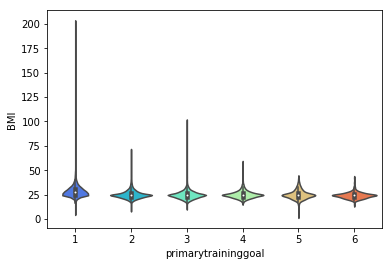

In [16]:
sns.violinplot(x="primarytraininggoal", y="BMI", data=df_users,palette='rainbow')

0     25.617285
1     24.596823
2     23.766065
3     23.327111
4     25.896688
5     26.040957
6     24.485652
7     31.977845
8     19.214916
9     34.374999
10    34.756935
11    29.561946
12    25.390625
13    30.683735
14    22.408787
15    24.691358
16    28.795329
17    21.948286
18    22.424814
19    30.897913
20    29.102099
21    24.691359
22    29.684957
23    21.948287
24    20.549887
25    24.040864
26    41.666669
27    24.218750
28    25.432686
29    31.578948
        ...    
69    25.551399
70    24.816793
71    23.722810
72    28.703705
73    22.463814
74    24.167163
75    24.170244
76    29.680082
77    36.139456
78    32.605889
79    25.617284
80    24.603222
81    24.816327
82    27.623134
83    25.264054
84    28.405337
85    28.157496
86    24.691358
87    22.775556
88    36.328198
89    24.134999
90    24.673519
91    26.528511
92    26.443221
94    23.030045
95    29.561946
96    29.306261
97    27.399045
98    24.691358
99    21.913581
Name: BMI, Length: 99, d